### 웹브라우저를 이용해서 스크래핑
* Selenium
 - 웹 테스트 도구
 
* selenium 설치
* 크롬 드라이버 설치

In [1]:
# selenium 설치
!pip install selenium

In [77]:
# 크롬드라이버 설치
# https://chromedriver.chromium.org/downloads
# 현재 설치된 크롬버전과 일치하는 파일 다운로드
# 크롬 오른쪽 상단 ... -> 도움말 -> Chrome 정보 에서 버전 확인
# 압축 풀어서 해당파일을 같은 폴더에 넣으면 경로지정할때 용이함

from selenium import webdriver
br = webdriver.Chrome('chromedriver')

In [78]:
# url 이동
br.get('http://www.daum.net')

In [7]:
br.save_screenshot('daum.png') # 해당 화면 스크린샷해서 저장하기

True

### selenium 메서드
#### 요소 추출 메서드
- find_element_by_id(아이디)
- find_element_by_name(name)
- find_element_by_css_selector(선택자)

#### 조작 메서드
- get(url) : url로 이동
- click() : 클릭
- send_keys(값) : 값 입력
- quit() : 종료
- implicitly_wait(초) : 최대 대기 시간(초)


In [79]:
# br.find_element_by_id('q').send_keys('파이썬') # 이전 버전
br.find_element('id', 'q').send_keys('파이썬')

In [56]:
from selenium.webdriver.common.keys import Keys
# br.find_element('id', 'q').send_keys(u'\ue007') # Keys를 import하지 않고 사용하는 법
br.find_element('id', 'q').send_keys(Keys.ENTER)

In [66]:
from selenium.webdriver.common.by import By

In [84]:
br.find_element(By.CSS_SELECTOR, '#daumSearch > fieldset > div > div > button.ico_pctop.btn_search').click()

'<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="win chrome"><head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="autocomplete" content="off">\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no">\n<meta property="og:title" content="파이썬 – Daum 검색">\n<meta property="og:url" content="https://search.daum.net/search?w=tot&amp;q=%ED%8C%8C%EC%9D%B4%EC%8D%AC">\n<meta property="og:description" content="Daum 검색에서 파이썬에 대한 최신정보를 찾아보세요.">\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png">\n<meta property="og:site_name" content="다음검색">\n<title>파이썬 – Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel="stylesheet" type="text/css" href="//search1.daumcdn.net/search/s
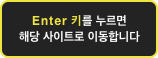

In [86]:
# 응답받은 소스
br.page_source

In [73]:
# 브라우저 종료
br.quit()

In [92]:
# 정리
from selenium import webdriver
br = webdriver.Chrome('chromedriver')
br.get('http://www.daum.net')
br.find_element('id', 'q').send_keys('파이썬')
from selenium.webdriver.common.by import By
br.find_element(By.CSS_SELECTOR, '#daumSearch > fieldset > div > div > button.ico_pctop.btn_search').click()
html = br.page_source
# br.quit()

'<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="win chrome"><head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="autocomplete" content="off">\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no">\n<meta property="og:title" content="파이썬 – Daum 검색">\n<meta property="og:url" content="https://search.daum.net/search?w=tot&amp;q=%ED%8C%8C%EC%9D%B4%EC%8D%AC">\n<meta property="og:description" content="Daum 검색에서 파이썬에 대한 최신정보를 찾아보세요.">\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png">\n<meta property="og:site_name" content="다음검색">\n<title>파이썬 – Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel="stylesheet" type="text/css" href="//search1.daumcdn.net/search/s
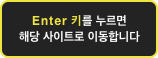

In [97]:
html

In [96]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
subject = soup.select('#mArticle > div > div:nth-child(4) > div > div > div.coll_cont > ul > li > div.wrap_cont > div.info_tit > a.fn_tit_u > strong')
subject
for s in subject:
    print(s.string)

에이콘아카데미 홍대학원
가비아 무제한 호스팅
100만명의 선택,KG에듀원
빅데이터 분석 솔루션 텍스톰
김서균 KG아이티뱅크 교육팀장
에듀윌 국비교육원
기업용 파이썬 나비엠알오
SBS아카데미컴퓨터학원분당점
파이썬, 컴스쿨닷컴
KG 아이티뱅크학원 주제희


In [124]:
'''
네이버 뉴스
https://n.news.naver.com/article/011/0004100236
제목 추출
 selenium + BeautifulSoup
댓글수 추출
'''

'\n네이버 뉴스\nhttps://n.news.naver.com/article/011/0004100236\n제목 추출\n selenium + BeautifulSoup\n댓글수 추출\n'

### selenium에서 특정 element의 로딩 대기
- WebDriverWait 객체를 통해 로딩 대기
- 이 기능을 활용하면 거의 모든 사이트에 크롤링 가능

In [110]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.common.by import By

In [123]:
from selenium import webdriver
# 브라우저 옵션
opt = webdriver.ChromeOptions()
opt.add_argument('headless') # 브라우저 숨김 (새창이 뜨지 않음)
br = webdriver.Chrome('chromedriver', chrome_options=opt)
br.get('https://n.news.naver.com/article/011/0004100236')
# 해당 element가 로딩될때까지 대기
obj = WebDriverWait(br, 5).until(ec.presence_of_element_located((By.CSS_SELECTOR, '.u_cbox_count')))
html = br.page_source
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
subject = soup.select_one('#ct > div.media_end_head.go_trans > div.media_end_head_title > h2')
subject.string

C:\Users\tjoeun-jr-902-02\AppData\Local\Temp\ipykernel_10292\2224970961.py:5: DeprecationWarning: use options instead of chrome_options
  br = webdriver.Chrome('chromedriver', chrome_options=opt)


"생삼겹 110만원어치 주문 후 잠적…역대급 노쇼에 주인 '멘붕'"

In [122]:
comment_count = soup.select_one('#cbox_module > div.u_cbox_wrap.u_cbox_ko.u_cbox_type_sort_favorite > div.u_cbox_head > a > span.u_cbox_count').string
comment_count

'225'

In [ ]:
'''
네이버 API를 이용해서
검색어 : 수리남
네이버뉴스 제목, 내용 추출
'''

In [188]:
import os
import sys
import urllib.request
import json, re
client_id = "aeWLdjxAXU_GuuCWUIs3"
client_secret = "시크릿키"
encText = urllib.parse.quote("수리남")

result = []
for i in range(10):
    url = "https://openapi.naver.com/v1/search/news.json?display=100&query=" + encText + "&start=" + str(i*100+1)# JSON 결과
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        res = response_body.decode('utf-8')
        data = json.loads(res)
#         items = data['items']
        result.append(data['items'])
    else:
        print("Error Code:" + rescode)

In [190]:
len(result)

10

In [191]:
result

[[{'title': '[인터뷰] 윤종빈 감독 “나도 재밌게 관객도 재밌게, <b>수리남</b>”',
   'originallink': 'https://kstar.kbs.co.kr/list_view.html?idx=229691',
   'link': 'https://n.news.naver.com/mnews/article/438/0000050129?sid=106',
   'description': '6부작 &lt;<b>수리남</b>&gt;(영어제목: Narco-Saints)이다. ‘<b>수리남</b>’은 1990년대 말에서 2000년대 초까지 남미의 소국 <b>수리남</b>에서 마약 밀매조직을 운영했던 조봉행이라는 실존인물을 잡기 위해 우리나라 국정원이 펼쳤던 작전에 투입된... ',
   'pubDate': 'Mon, 19 Sep 2022 14:26:00 +0900'},
  {'title': '<b>수리남</b> 정부 발끈해도 흥행 순항 중인 ‘<b>수리남</b>’',
   'originallink': 'https://www.newsen.com/news_view.php?uid=202209191418412410',
   'link': 'https://n.news.naver.com/mnews/article/609/0000629987?sid=106',
   'description': '넷플릭스 ‘<b>수리남</b>’ 열풍이 이어지고 있다. OTT 통합검색 및 콘텐츠 추천 플랫폼 키노라이츠가 9월 18일 발표한 9월 2주 차(9/10~9/16) 통합 콘텐츠 랭킹에서 넷플릭스 &apos;<b>수리남</b>&apos;이 지난 추석 연휴에 이어 정상을 지켰다.... ',
   'pubDate': 'Mon, 19 Sep 2022 14:22:00 +0900'},
  {'title': '[더벨]스튜디오드래곤, 속도 낸 멀티스튜디오 전략…SLL에 뺏긴 1위 탈환할까',
   'originallink': 'http://www.thebell.co.kr/front/free/conten

In [193]:
link = []
for r in result :
    
    for item in r:
        if 'n.news.naver.com' in item['link']:
            link.append(item['link'])

In [194]:
link

['https://n.news.naver.com/mnews/article/438/0000050129?sid=106',
 'https://n.news.naver.com/mnews/article/609/0000629987?sid=106',
 'https://n.news.naver.com/mnews/article/448/0000374526?sid=103',
 'https://n.news.naver.com/mnews/article/609/0000629970?sid=106',
 'https://n.news.naver.com/mnews/article/052/0001790914?sid=106',
 'https://n.news.naver.com/mnews/article/028/0002606734?sid=103',
 'https://n.news.naver.com/mnews/article/241/0003229988?sid=106',
 'https://n.news.naver.com/mnews/article/119/0002640187?sid=106',
 'https://n.news.naver.com/mnews/article/052/0001790856?sid=106',
 'https://n.news.naver.com/mnews/article/415/0000012859?sid=106',
 'https://n.news.naver.com/mnews/article/421/0006341246?sid=106',
 'https://n.news.naver.com/mnews/article/408/0000167302?sid=106',
 'https://n.news.naver.com/mnews/article/001/0013446346?sid=103',
 'https://n.news.naver.com/mnews/article/119/0002640070?sid=106',
 'https://n.news.naver.com/mnews/article/144/0000837324?sid=106',
 'https://

In [195]:
len(link)

57

In [228]:
from tqdm import tqdm_notebook

In [229]:
from selenium import webdriver
from bs4 import BeautifulSoup

# 브라우저 옵션
opt = webdriver.ChromeOptions()
#     opt.add_argument('headless') # 브라우저 숨김 (새창이 뜨지 않음)
br = webdriver.Chrome('chromedriver')

subjects = []
contents = []
for i in tqdm_notebook(range(len(link))):
    br.get(link[i])
    html = br.page_source
    soup = BeautifulSoup(html, 'html.parser')
    try :
        subject = soup.select_one('#content > div.end_ct > div > h2').string.strip()
        content = soup.select_one('#articeBody').get_text()
        subjects.append(subject)
        contents.append(content)
    except:
        pass
br.quit()

C:\Users\tjoeun-jr-902-02\AppData\Local\Temp\ipykernel_10292\2746051134.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(link))):


  0%|          | 0/57 [00:00<?, ?it/s]

In [226]:
subjects

['[인터뷰] 윤종빈 감독 “나도 재밌게 관객도 재밌게, 수리남”',
 '수리남 정부 발끈해도 흥행 순항 중인 ‘수리남’',
 '사생활 논란 김민귀 ‘수리남’서도 역할 대폭 축소',
 "[Y피플] '작은아씨들'부터 '수리남'까지…추자현, 이쯤 되면 '카메오 요정'",
 '‘수리남’ 윤종빈 감독 “박찬호 사인볼은 진짜! 캐릭터의 욕망 상징” [일문일답]',
 '[D:이슈] 걸프 국가들부터 수리남까지…국가 항의에 난감한 넷플릭스 ‘표현의 자유’',
 "'오징어게임' 시즌2 어디까지 왔나, 화제의 넷플릭스 오리지널 外",
 '법적 대응 논란 뜨거운데…‘수리남’ 열풍 식을 줄 모르네',
 "'수리남', 한국·홍콩·싱가포르 등 8개국 넷플릭스 TV부문 1위…전세계 4위",
 '넷플릭스 ‘수리남’ 열풍, 2주째 콘텐츠 랭킹 1위',
 '[D:방송 뷰] 물량공세에도 쉽지 않은 ‘공감’…글로벌 겨냥 쉽지 않은 OTT 예능',
 '하정우, 인터뷰 시작부터 고개숙인 이유[인터뷰]',
 '[인터뷰①] \'수리남\' 하정우 "절친 윤종빈 집요하고 대단, 각오 남달랐다"',
 '[인터뷰②] \'수리남\' 하정우 "황정민 에너제틱…우아한 유연석"',
 '“국가 이미지 훼손” “표현의 자유”… ‘수리남’ 갑론을박',
 'K드라마는 통하는데…힘 못쓰는 K예능',
 '‘특별출연자’ 추자현·곽동연…주연 뺨친 존재감 ‘가성비 갑’',
 '\'수리남\' 감독 "실제 재소자들 출연, 빵 사주고 영치금 넣어줘"',
 '[인터뷰] ‘수리남’ 하정우 “성찰과 반성의 2년…한걸음 한걸음 다가가겠다”',
 '\'수리남\' 유연석 "현봉식과 동갑내기, 말 쉽게 놓기 힘들어"',
 '[TEN인터뷰] "빨리 벗어나고 싶었다" 하정우, 시리즈물 \'수리남\'으로 2년 만에 복귀',
 '[이슈] 알면서도 뻔뻔했던 ‘수리남’, ‘탑건’과 다른 이유',
 '[D:인터뷰] 하정우 “제가 맷 데이먼도 아닌데”…‘미션 임파서블’ 언더커버의 탄생',
 '[왓IS] 제목에 발목 잡힌 ‘수리남’… 책임은 누구에게?',
 '‘신사

In [221]:
contents

['\n이미지 원본보기\n윤종빈 감독영화 \'범죄와의 전쟁: 나쁜놈들 전성시대\', \'군도: 민란의 시대\', \'공작\' 등 확연하게 ‘남성’적 영화를 만들어온 윤종빈 감독이 넷플릭스와 손을 잡고 처음으로 오리지널 드라마를 만들었다. 6부작 <수리남>(영어제목: Narco-Saints)이다. ‘수리남’은 1990년대 말에서 2000년대 초까지 남미의 소국 수리남에서 마약 밀매조직을 운영했던 조봉행이라는 실존인물을 잡기 위해 우리나라 국정원이 펼쳤던 작전에 투입된 민간인 K씨의 실화를 바탕으로 만든 드라마이다. 윤 감독은 절친 배우 하정우에게서 ‘영화’ ‘수리남’의 감독을 제의받지만 한차례 거절했단다. [공작]을 끝내놓고서 다시 제안을 받자 ‘영화’ 말고 ‘드라마’로 찍자면서 넷플릭스와 작업이 시작되었다. 당초 8부작을 찍을 생각이었지만 결국 6부작으로 완성된다. 요즘 글로벌대세인 K콘텐츠답게 공개 되자마자 글로벌 순위가 쑥쑥 올라가고 있는 상황에서 윤종빈 감독을 만나 넷플릭스와의 작업 소감을 들어보았다.먼저 ‘수리남’측 반응에 대해 물어보았다. 지난 주 외신에 따르면 알베르트 람딘 수리남 외교·국제사업·국제협력부(BIBIS) 장관은 넷플릭스 ‘수리남’이 자기 나라를 마약국가로 몰고 있다면서 법적 대응을 검토하겠다고 밝혔다Q. 수리남 정부관계자가 이 작품에 대해 불만을 토로했다. 이에 대한 대응 방안은?▷윤종빈 감독: “노코멘트. 넷플릭스 측에서 이야기할 것이다.”Q. 이 작품을 보고는 다들 ‘수리남’이 화나겠다고 생각할 것이다. 작품을 만들 때 법률적인 검토 같은 것은 하지 않았나? 넷플릭스는 그런 노하우가 많을 텐데.▷윤종빈 감독: “넷플릭스가 검토했었다.”Q. 왜 제목을 굳이 ‘수리남’으로 정했나.▷윤종빈 감독: “아무리 생각해봐도 그보다 더 좋은 제목이 안 떠올랐다. 픽션이긴 하지만 실화를 바탕으로 하는 것이라서 다른 이름을 사용할 필요성을 못 느꼈다.”이미지 원본보기\n넷플릭스 \'수리남\'Q. 이 영화는 수리남에서 활동하던 한국인 마약상의 실제 사